# Segementing_Countries_for_NGO_Aid_using_Clustering

## <font color = red> Step 1 : Reading and Understanding the Data </font>

### <font color = brown> # Import Standard Libraries & Warnings </font>

In [805]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [806]:
import warnings
warnings.filterwarnings('ignore')

### <font color = brown> # Load the Data set </font>

In [807]:
# loading the data set
df = pd.read_csv("Country-data.csv")

In [808]:
# viewing sample records

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [809]:
# viewing the shape of the data set

df.shape

(167, 10)

## <font color = red> Step 2 : Perform EDA </font>

### <font color = brown> # Checking for missing values </font>

In [810]:
# checking the info of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [811]:
# checking for null values in the data set

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [812]:
# checking for NAN values in the data set

df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### <font color = blue> Observation : </font>
- There are no NULL or NAN values in the dataframe
- The data seems to be in the correct format

In [813]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### <font color = blue> Observation : </font>
- The minimum and maximum values for 'income' and 'gdpp' are very apart from the mean values
- There may be outliers and we will confirm that using univariate analysis

In [814]:
# checking for duplicate values

df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### <font color = blue> Observation : </font>
- There are no duplicate data

### <font color = brown> # Data conversion </font>
- The columns 'exports','health' and 'imports' are given as a percentage of the 'gdpp'
- We need to convert them to the actual values

In [815]:
# converting the columns from percentages to absolute values

df['imports'] = df['imports'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [816]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### <font color = brown> # Correlation Heatmap </font>

In [817]:
cor = df.corr()
cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


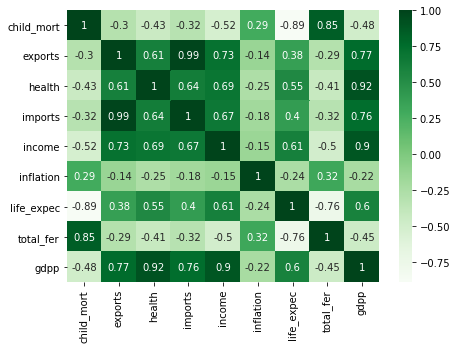

In [818]:
plt.figure(figsize = (7,5))
sns.heatmap(cor, annot = True, cmap="Greens")
plt.show()

### <font color = blue> Observation : </font>
- We see that the columns 'life_expec' and 'total_fer' are highly correlated with 'child_mortality'
- The columns 'imports', 'exports', 'health' and 'income' are highly correlated with 'gdpp'

### <font color = brown> # Univariate Analysis </font>


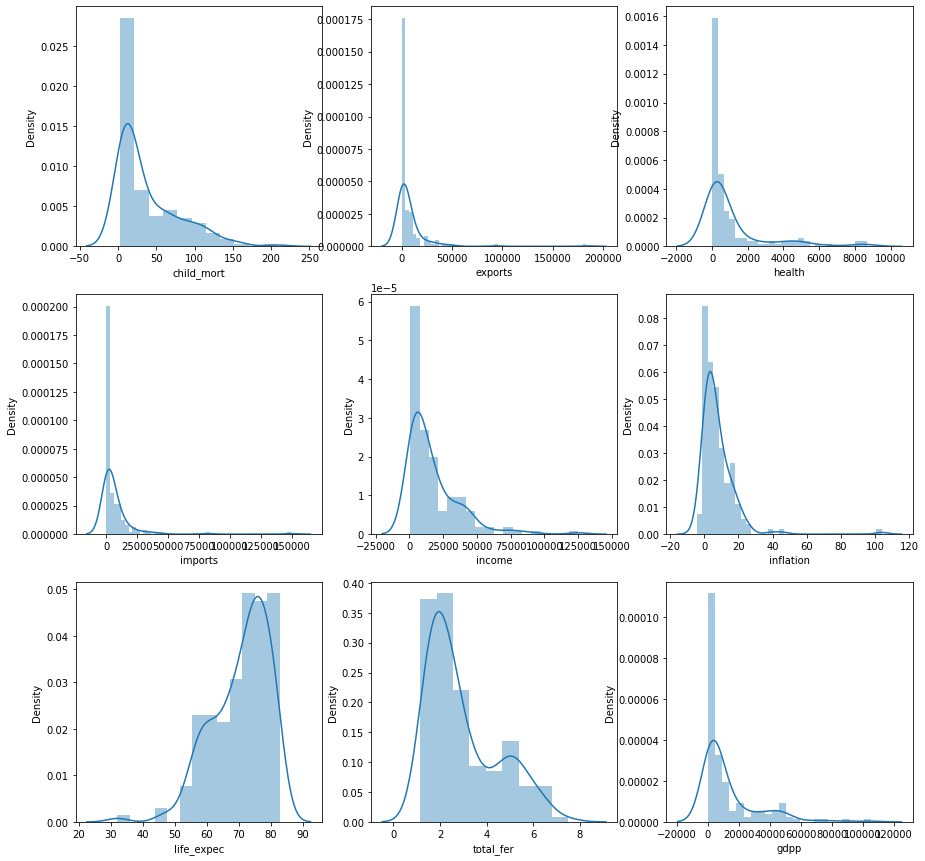

In [819]:
plt.figure(figsize=(15, 15))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])

### <font color = blue> Observation : </font>
- The features 'imports','exports','health','life_expec' and 'inflation' are normally distributed.
- While the 'child_mort','income','total_fer' and 'gdpp' can give us insight into cluster behavior
- But we may also ignore 'total_fer' in favor of 'child_mort' as they are highly corelated.

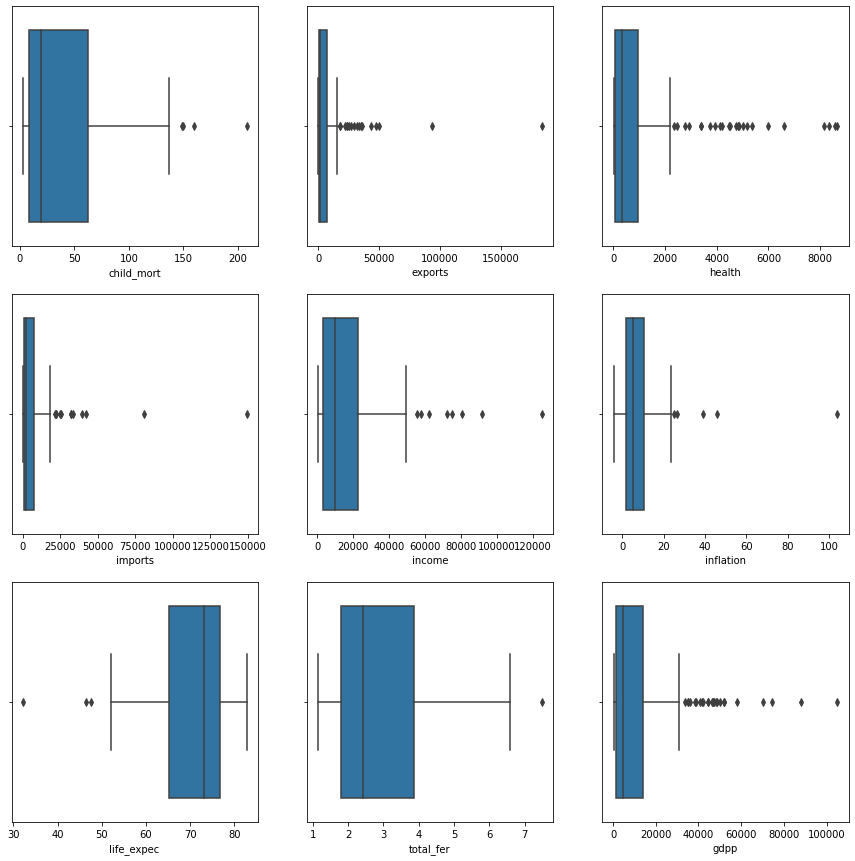

In [820]:
# To plot the box plot for all the columns

plt.figure(figsize=(15, 15))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df[i[1]])

## <font color = red> Step 3 : Data Preparation </font>


### <font color = brown> # Outlier Treatment </font>


In [821]:
col = df.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [822]:
# Listing columns who have outliers on the higher side
high_col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'total_fer', 'gdpp']

# listing columns who have outliers on the lower side
low_col = ['life_expec']

In [823]:
# Soft capping the high outliers at Q3 + 1.5(IQR)

for i in high_col:
    q3, q1 = np.percentile(df[i], [75 ,25])
    iqr = q3 - q1
    high = q3 + (iqr*1.5)
    df[i][df[i]>=high] = high

# Soft capping the high outliers at Q1 - 1.5(IQR)

for i in low_col:
    q3, q1 = np.percentile(df[i], [75 ,25])
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    df[i][df[i]<=low] = low

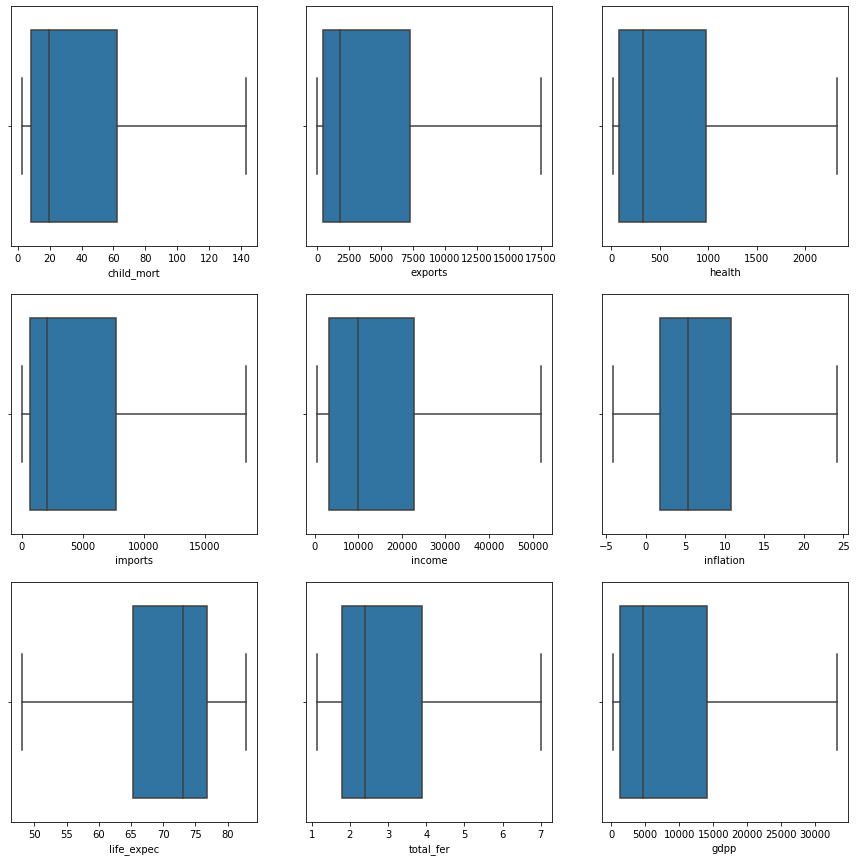

In [824]:
plt.figure(figsize=(15, 15))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df[i[1]])

### <font color = blue> Observation : </font>
- The outliers have been handled

### <font color = brown> # Hopkins Statistics </font>


In [825]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [826]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [827]:
hopkins(df.drop("country", axis = 1))

0.8425384002990346

### <font color = blue> Observation : </font>
- The average hopkins score in 10 iterations is above 0.85

### <font color = brown> # Scaling the Data </font>


In [828]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop("country", axis = 1))
df1

array([[ 1.36980194, -0.80056371, -0.79556251, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.61314982, -0.51391972, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.51557561, -0.6160104 , ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738, -0.64788476, -0.73612924, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.74249447, -0.76323195, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.71718267, -0.7406285 , ..., -2.19651829,
         1.63547189, -0.7679976 ]])

In [829]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


## <font color = red> Step 4 : K-Means Clustering </font>


### <font color = brown> # Selection of k </font>


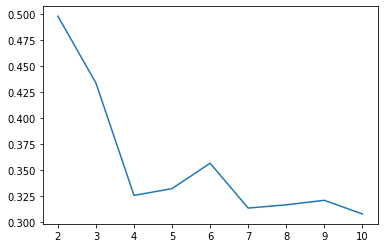

In [830]:
from sklearn.metrics import silhouette_score
# We look at the maximum value

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])
plt.show()

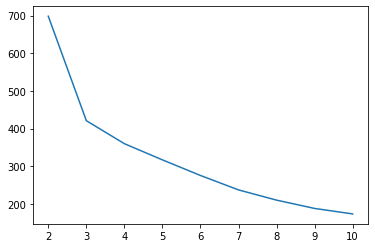

In [831]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

### <font color = blue> Observation : </font>
- From the silhouette score we see that the global maxima is at k=3 and then the graph drops
- From the Elbow curve we see that at k=3 a sharp elbow is formed
- We can select the value of k as 3 taking both the above considerations

### <font color = brown> # K = 3 </font>

### <font color = brown> # Cluster formation </font>

In [832]:
# K = 3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [833]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [834]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [835]:
df1['k3_cluster_id'] = kmean.labels_

In [836]:
df=pd.merge(df,df1.loc[:,'k3_cluster_id'], left_index=True,right_index=True)

In [837]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [838]:
# Let's check how may data points we have in each cluster
df.k3_cluster_id.value_counts()

2    78
0    48
1    41
Name: k3_cluster_id, dtype: int64

### <font color = brown> # Cluster Vizualisation </font>

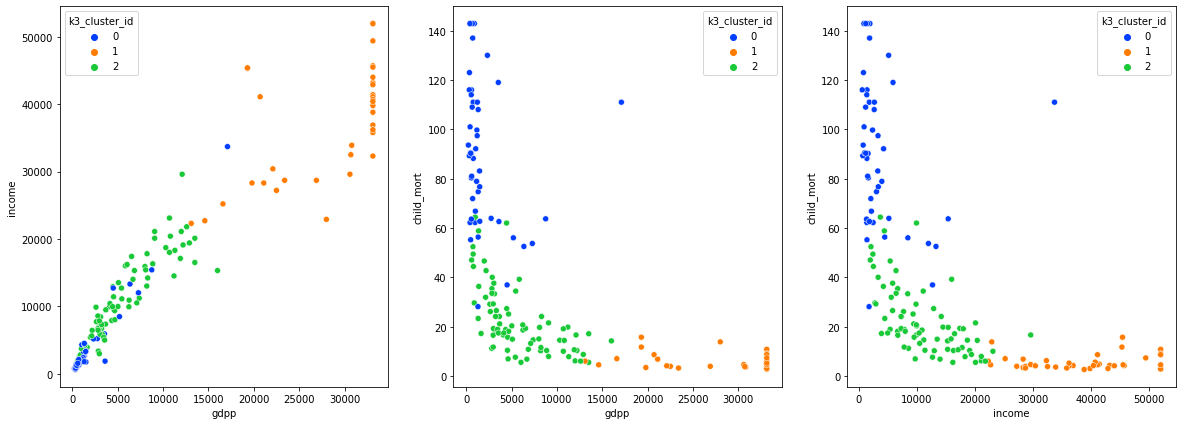

In [839]:
# cluster Visualization

plt.figure(figsize=(20,7))
plt.subplot(131)
sns.scatterplot(x = 'gdpp', y ='income', hue = 'k3_cluster_id', data =df, palette = 'bright')

plt.subplot(132)
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'k3_cluster_id', data =df, palette = 'bright')

plt.subplot(133)
sns.scatterplot(x = 'income', y ='child_mort', hue = 'k3_cluster_id', data =df, palette = 'bright')

plt.show()

### <font color = brown> # Cluster Profiling </font>

In [840]:
# checking the mean of the 'gdpp', 'income', 'child_mort' columns

df[['gdpp', 'income', 'child_mort', 'k3_cluster_id']].groupby('k3_cluster_id').mean()

,gdpp,income,child_mort
k3_cluster_id,,,
0,1909.208333,3897.354167,89.620833
1,28969.512195,38988.780488,5.651220
2,5759.897436,11196.025641,22.591026


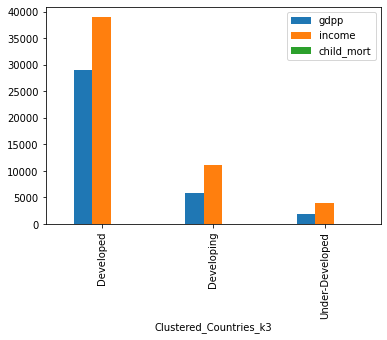

,gdpp,income,child_mort
Clustered_Countries_k3,,,
Developed,28969.512195,38988.780488,5.651220
Developing,5759.897436,11196.025641,22.591026
Under-Developed,1909.208333,3897.354167,89.620833


In [841]:
for i,cluster in enumerate(df.k3_cluster_id):
    if(cluster==0):
        df.loc[i,'Clustered_Countries_k3']='Under-Developed'
    elif(cluster==1):
        df.loc[i,'Clustered_Countries_k3']='Developed'
    else:
        df.loc[i,'Clustered_Countries_k3']='Developing'
        
df[['gdpp', 'income', 'child_mort', 'Clustered_Countries_k3']].groupby('Clustered_Countries_k3').mean().plot(kind = 'bar')
plt.show()

df[['gdpp', 'income', 'child_mort', 'Clustered_Countries_k3']].groupby('Clustered_Countries_k3').mean()

### <font color = blue> Observation : </font>
- Cluster Id 0 has the lowest 'gdpp' and 'income' and high child mortality values
- we will choose cluster id 0 as the under developed countries that are in need of aid

In [842]:
# K = 4

kmean = KMeans(n_clusters = 4, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [843]:
kmean.labels_

array([2, 0, 0, 2, 3, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 2, 0, 0, 3, 2,
       0, 1, 3, 2, 2, 0, 2, 1, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 0, 1, 2, 1, 3, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1, 3, 0, 2, 0, 3, 2, 3, 3,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 3, 2, 2, 0, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2])

In [844]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,Developing


In [845]:
df1['k4_cluster_id'] = kmean.labels_

In [846]:
df=pd.merge(df,df1.loc[:,'k4_cluster_id'], left_index=True,right_index=True)

In [847]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Under-Developed,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,Developing,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,Developing,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Under-Developed,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,Developing,3


In [848]:
# Let's check how may data points we have in each cluster
df.k4_cluster_id.value_counts()

0    53
2    48
1    37
3    29
Name: k4_cluster_id, dtype: int64

### <font color = brown> # Cluster Vizualisation </font>

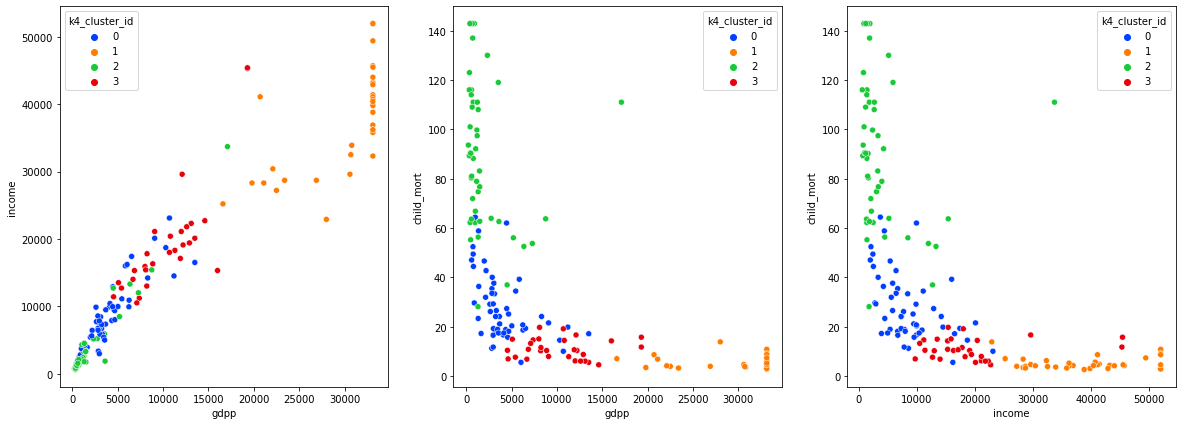

In [849]:
# cluster Visualization

plt.figure(figsize=(20,7))
plt.subplot(131)
sns.scatterplot(x = 'gdpp', y ='income', hue = 'k4_cluster_id', data =df, palette = 'bright')

plt.subplot(132)
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'k4_cluster_id', data =df, palette = 'bright')

plt.subplot(133)
sns.scatterplot(x = 'income', y ='child_mort', hue = 'k4_cluster_id', data =df, palette = 'bright')

plt.show()

### <font color = brown> # Cluster Profiling </font>

In [850]:
# checking the mean of the 'gdpp', 'income', 'child_mort' columns

df[['gdpp', 'income', 'child_mort', 'k4_cluster_id']].groupby('k4_cluster_id').mean()

,gdpp,income,child_mort
k4_cluster_id,,,
0,4060.415094,8590.000000,27.981132
1,30309.459459,39536.216216,5.237838
2,1909.208333,3897.354167,89.620833
3,10357.586207,19093.793103,10.931034


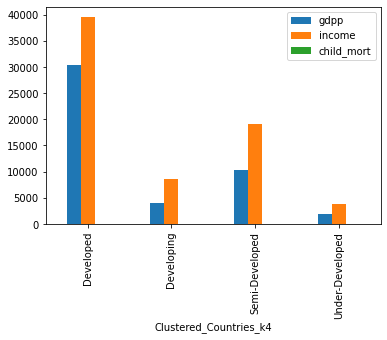

,gdpp,income,child_mort
Clustered_Countries_k4,,,
Developed,30309.459459,39536.216216,5.237838
Developing,4060.415094,8590.000000,27.981132
Semi-Developed,10357.586207,19093.793103,10.931034
Under-Developed,1909.208333,3897.354167,89.620833


In [851]:
for i,cluster in enumerate(df.k4_cluster_id):
    if(cluster==0):
        df.loc[i,'Clustered_Countries_k4']='Developing'
    elif(cluster==1):
        df.loc[i,'Clustered_Countries_k4']='Developed'
    elif(cluster==2):
        df.loc[i,'Clustered_Countries_k4']='Under-Developed'
    else:
        df.loc[i,'Clustered_Countries_k4']='Semi-Developed'
        
df[['gdpp', 'income', 'child_mort', 'Clustered_Countries_k4']].groupby('Clustered_Countries_k4').mean().plot(kind = 'bar')
plt.show()

df[['gdpp', 'income', 'child_mort', 'Clustered_Countries_k4']].groupby('Clustered_Countries_k4').mean()

### <font color = blue> Observation : </font>
- Cluster Id 0 has the lowest 'gdpp' and 'income' and high child mortality values
- we will choose cluster id 0 as the under developed countries that are in need of aid

#### Taking into account the results of both the k values the choice of k = 3 seems more appropiate

In [852]:
# Deriving the needy countries by taking K=3

In [853]:
# viewing the entire countries in need of aid

k_Needy = df[df['k3_cluster_id']==0]
k_Needy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4
0,Afghanistan,90.200,55.3000,41.9174,248.297,1610.0,9.440,56.20,5.8200,553,0,Under-Developed,2,Under-Developed
3,Angola,119.000,2199.1900,100.6050,1514.370,5900.0,22.400,60.10,6.1600,3530,0,Under-Developed,2,Under-Developed
17,Benin,111.000,180.4040,31.0780,281.976,1820.0,0.885,61.80,5.3600,758,0,Under-Developed,2,Under-Developed
21,Botswana,52.500,2768.6000,527.0500,3257.550,13300.0,8.920,57.10,2.8800,6350,0,Under-Developed,2,Under-Developed
25,Burkina Faso,116.000,110.4000,38.7550,170.200,1430.0,6.810,57.90,5.8700,575,0,Under-Developed,2,Under-Developed
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.300,57.70,6.2600,231,0,Under-Developed,2,Under-Developed
28,Cameroon,108.000,290.8200,67.2030,353.700,2660.0,1.910,57.30,5.1100,1310,0,Under-Developed,2,Under-Developed
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.010,48.05,5.2100,446,0,Under-Developed,2,Under-Developed
32,Chad,142.875,330.0960,40.6341,390.195,1930.0,6.390,56.50,6.5900,897,0,Under-Developed,2,Under-Developed
36,Comoros,88.200,126.8850,34.6819,397.573,1410.0,3.870,65.90,4.7500,769,0,Under-Developed,2,Under-Developed


In [854]:
# checking the total number of countries in need

k_Needy.shape[0]

48

In [855]:
# Top 10 most needy countries

k_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231,0,Under-Developed,2,Under-Developed
88,Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327,0,Under-Developed,2,Under-Developed
37,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0,Under-Developed,2,Under-Developed
112,Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0,Under-Developed,2,Under-Developed
132,Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0,Under-Developed,2,Under-Developed
93,Madagascar,62.200,103.2500,15.5701,177.590,1390.0,8.79,60.80,4.6000,413,0,Under-Developed,2,Under-Developed
106,Mozambique,101.000,131.9850,21.8299,193.578,918.0,7.64,54.50,5.5600,419,0,Under-Developed,2,Under-Developed
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0,Under-Developed,2,Under-Developed
94,Malawi,90.500,104.6520,30.2481,160.191,1030.0,12.10,53.10,5.3100,459,0,Under-Developed,2,Under-Developed
50,Eritrea,55.200,23.0878,12.8212,112.306,1420.0,11.60,61.70,4.6100,482,0,Under-Developed,2,Under-Developed


In [856]:
# creating a new dataframe for the top 10 most needy countries 

k_Most_Needy = k_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
k_Most_Needy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231,0,Under-Developed,2,Under-Developed
88,Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327,0,Under-Developed,2,Under-Developed
37,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0,Under-Developed,2,Under-Developed
112,Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0,Under-Developed,2,Under-Developed
132,Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0,Under-Developed,2,Under-Developed
93,Madagascar,62.200,103.2500,15.5701,177.590,1390.0,8.79,60.80,4.6000,413,0,Under-Developed,2,Under-Developed
106,Mozambique,101.000,131.9850,21.8299,193.578,918.0,7.64,54.50,5.5600,419,0,Under-Developed,2,Under-Developed
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0,Under-Developed,2,Under-Developed
94,Malawi,90.500,104.6520,30.2481,160.191,1030.0,12.10,53.10,5.3100,459,0,Under-Developed,2,Under-Developed
50,Eritrea,55.200,23.0878,12.8212,112.306,1420.0,11.60,61.70,4.6100,482,0,Under-Developed,2,Under-Developed


In [857]:
print('Top 10 countries in most need of aid are:\n')
for countries in k_Most_Needy.country:
    print(countries)

Top 10 countries in most need of aid are:

Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Madagascar
Mozambique
Central African Republic
Malawi
Eritrea


## <font color = red> Step 5 : Hierarchical Clustering (Single Linkage) </font>

### <font color = brown> # Dendograms </font>

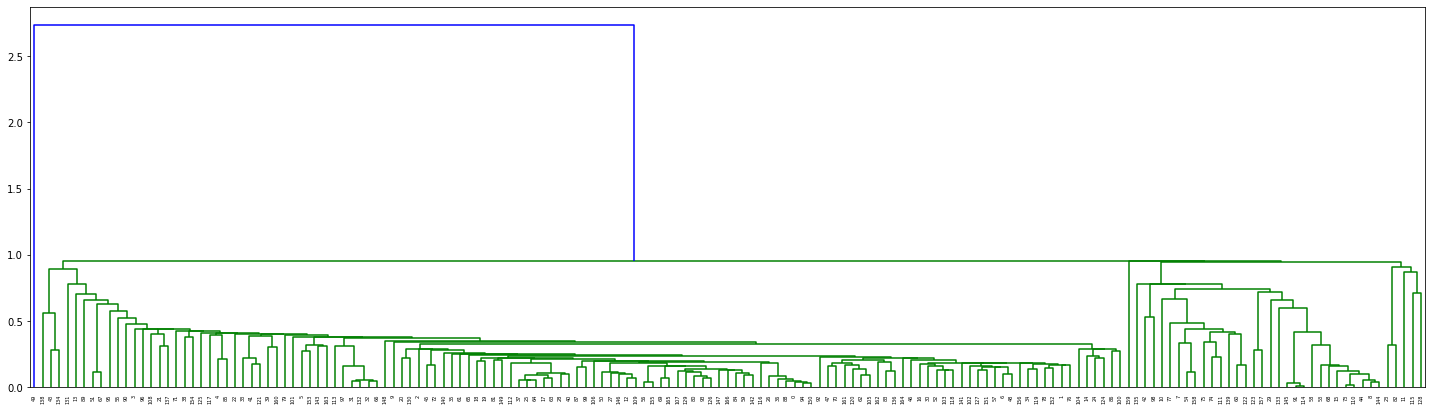

In [858]:
import scipy.cluster.hierarchy as hc
mergings=linkage(df1.iloc[:,:5],method='single',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)

### <font color = blue> Observation : </font>
- We can broadly see 4 clusters and anything below that is not very clearly distinguishable
- But the only way to cut the tree at a little below the value of 10 on the y axis gives us 5 points

### <font color = brown> # Cluster formation </font>

In [859]:
hs_clusters=cut_tree(mergings,n_clusters=5)
df1['hs_cluster_id']=hs_clusters.reshape(-1)
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,k3_cluster_id,k4_cluster_id,hs_cluster_id
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341,0,2,0
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827,2,0,0
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868,2,0,0
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198,0,2,0
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686,2,3,0


In [860]:
#value counts of cluster ids
df1['hs_cluster_id'].value_counts()

0    130
1     30
2      5
4      1
3      1
Name: hs_cluster_id, dtype: int64

In [861]:
df=pd.merge(df,df1.loc[:,'hs_cluster_id'], left_index=True,right_index=True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Under-Developed,2,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,Developing,0,Developing,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,Developing,0,Developing,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Under-Developed,2,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,Developing,3,Semi-Developed,0


### <font color = brown> # Cluster Visualization </font>

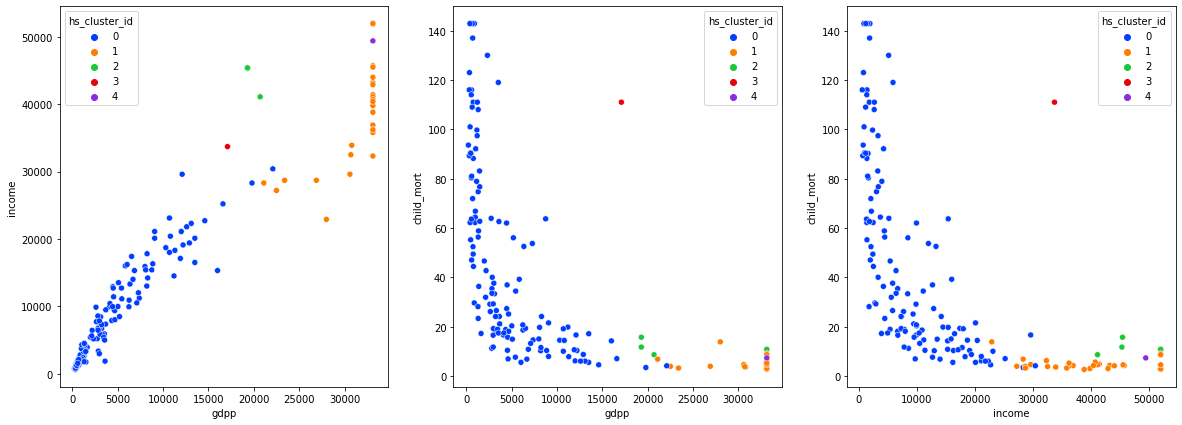

In [862]:
# cluster Visualization

plt.figure(figsize=(20,7))
plt.subplot(131)
sns.scatterplot(x = 'gdpp', y ='income', hue = 'hs_cluster_id', data =df, palette = 'bright')

plt.subplot(132)
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'hs_cluster_id', data =df, palette = 'bright')

plt.subplot(133)
sns.scatterplot(x = 'income', y ='child_mort', hue = 'hs_cluster_id', data =df, palette = 'bright')

plt.show()

### <font color = brown> # Cluster Profiling </font>

In [863]:
# checking the mean of the columns 'gdpp', 'income', 'child_mort'

df[['gdpp', 'income', 'child_mort', 'hs_cluster_id']].groupby('hs_cluster_id').mean()

,gdpp,income,child_mort
hs_cluster_id,,,
0,4692.415385,8888.946154,45.983846
1,31428.666667,39483.500000,4.736667
2,25112.000000,47147.000000,11.460000
3,17100.000000,33700.000000,111.000000
4,33130.000000,49400.000000,7.300000


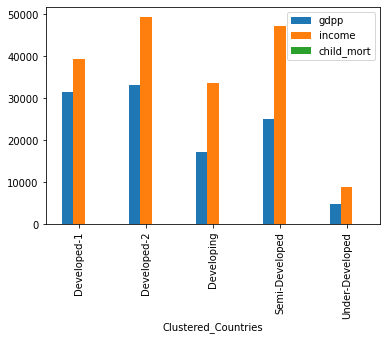

,gdpp,income,child_mort
Clustered_Countries,,,
Developed-1,31428.666667,39483.500000,4.736667
Developed-2,33130.000000,49400.000000,7.300000
Developing,17100.000000,33700.000000,111.000000
Semi-Developed,25112.000000,47147.000000,11.460000
Under-Developed,4692.415385,8888.946154,45.983846


In [864]:
for i,cluster in enumerate(df.hs_cluster_id):
    if(cluster==0):
        df.loc[i,'Clustered_Countries']='Under-Developed'
    elif(cluster==1):
        df.loc[i,'Clustered_Countries']='Developed-1'
    elif(cluster==2):
        df.loc[i,'Clustered_Countries']='Semi-Developed'
    elif(cluster==3):
        df.loc[i,'Clustered_Countries']='Developing'
    else:
        df.loc[i,'Clustered_Countries']='Developed-2'
        
df[['gdpp', 'income', 'child_mort', 'Clustered_Countries']].groupby('Clustered_Countries').mean().plot(kind = 'bar')
plt.show()

df[['gdpp', 'income', 'child_mort', 'Clustered_Countries']].groupby('Clustered_Countries').mean()

In [865]:
hs_Needy = df[df['hs_cluster_id']==0]
hs_Needy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id,Clustered_Countries
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Under-Developed,2,Under-Developed,0,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,Developing,0,Developing,0,Under-Developed
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,Developing,0,Developing,0,Under-Developed
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Under-Developed,2,Under-Developed,0,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,Developing,3,Semi-Developed,0,Under-Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970,2,Developing,0,Developing,0,Under-Developed
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,24.16,75.4,2.47,13500,2,Developing,0,Developing,0,Under-Developed
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310,2,Developing,0,Developing,0,Under-Developed
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310,0,Under-Developed,2,Under-Developed,0,Under-Developed


In [866]:
hs_Needy.shape

(130, 16)

In [867]:
# Top 10 most needy countries

hs_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id,Clustered_Countries
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231,0,Under-Developed,2,Under-Developed,0,Under-Developed
88,Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327,0,Under-Developed,2,Under-Developed,0,Under-Developed
37,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0,Under-Developed,2,Under-Developed,0,Under-Developed
112,Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0,Under-Developed,2,Under-Developed,0,Under-Developed
132,Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0,Under-Developed,2,Under-Developed,0,Under-Developed
93,Madagascar,62.200,103.2500,15.5701,177.590,1390.0,8.79,60.80,4.6000,413,0,Under-Developed,2,Under-Developed,0,Under-Developed
106,Mozambique,101.000,131.9850,21.8299,193.578,918.0,7.64,54.50,5.5600,419,0,Under-Developed,2,Under-Developed,0,Under-Developed
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0,Under-Developed,2,Under-Developed,0,Under-Developed
94,Malawi,90.500,104.6520,30.2481,160.191,1030.0,12.10,53.10,5.3100,459,0,Under-Developed,2,Under-Developed,0,Under-Developed
50,Eritrea,55.200,23.0878,12.8212,112.306,1420.0,11.60,61.70,4.6100,482,0,Under-Developed,2,Under-Developed,0,Under-Developed


In [868]:
hs_Most_Needy = hs_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

In [869]:
print('HIERARCHICAL CLUSTERING\nTop 10 countries in most need of aid are:\n')

for countries in hs_Most_Needy.country[:10]:
    print(countries)

HIERARCHICAL CLUSTERING
Top 10 countries in most need of aid are:

Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Madagascar
Mozambique
Central African Republic
Malawi
Eritrea


## <font color = red> Step 6 : Hierarchical Clustering (Complete Linkage) </font>

### <font color = brown> # Dendograms </font>

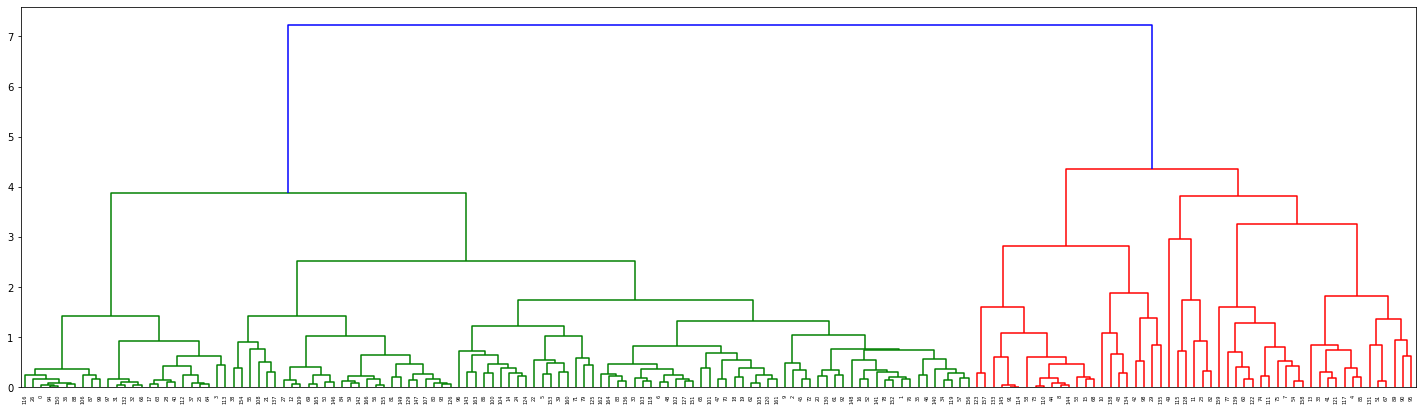

In [870]:
mergings=linkage(df1.iloc[:,:5],method='complete',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)
plt.show()

### <font color = blue> Observation : </font>
- We can see that the only logical grouping can be formed if we cut the tree at a little below 4 on the y-axis
- This will give us around 5 clusters that can properly cover the whlole dendograms
- choosing 2 clusters will be too vague and 3 cluster will only represent the right side of the graph

### <font color = brown> # Cluster Formation </font>

In [871]:
hc_clusters=cut_tree(mergings,n_clusters=5)
df1['hc_cluster_id']=hc_clusters.reshape(-1)
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,k3_cluster_id,k4_cluster_id,hs_cluster_id,hc_cluster_id
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341,0,2,0,0
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827,2,0,0,1
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868,2,0,0,1
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198,0,2,0,0
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686,2,3,0,2


In [872]:
#value counts of cluster ids
df1['hc_cluster_id'].value_counts()

1    89
0    25
2    24
3    23
4     6
Name: hc_cluster_id, dtype: int64

In [873]:
df=pd.merge(df,df1.loc[:,'hc_cluster_id'], left_index=True,right_index=True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id,Clustered_Countries,hc_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,Developing,0,Developing,0,Under-Developed,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,Developing,0,Developing,0,Under-Developed,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,Developing,3,Semi-Developed,0,Under-Developed,2


### <font color = brown> # Cluster Vizualisation </font>

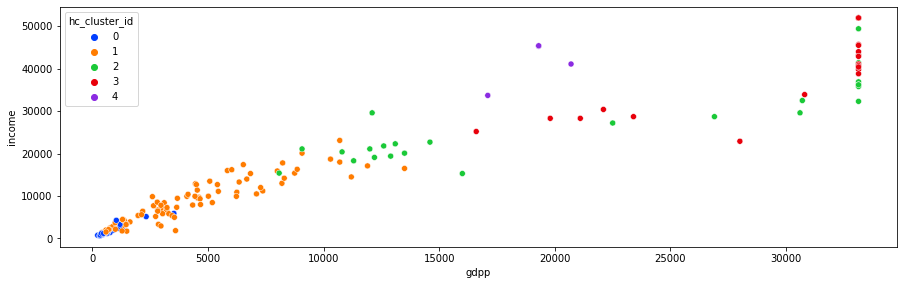

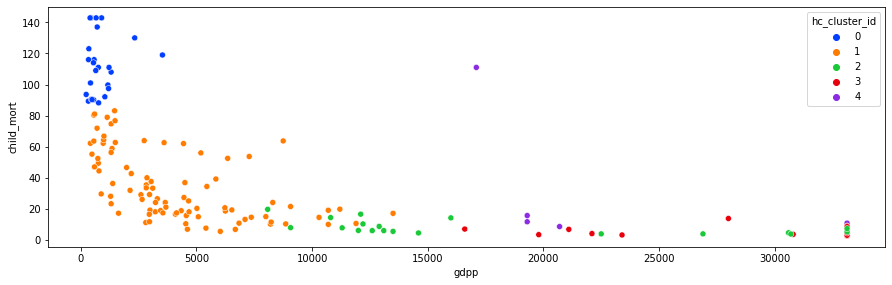

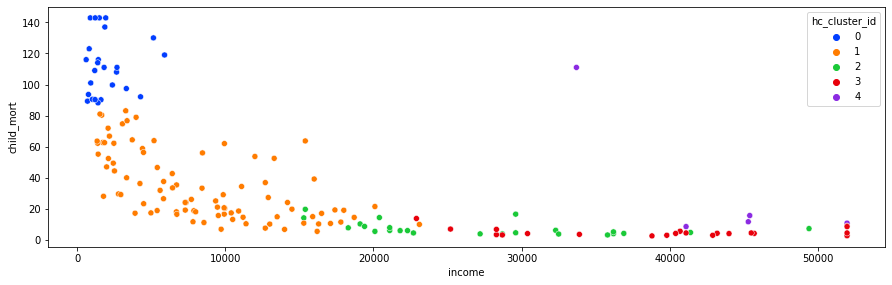

In [874]:
# Let's check how may data points we have in each cluster
df.hc_cluster_id.value_counts()

plt.figure(figsize=(15, 15))
plt.subplot(311)
sns.scatterplot(x = 'gdpp', y ='income', hue = 'hc_cluster_id', data =df, palette = 'bright')

plt.figure(figsize=(15, 15))
plt.subplot(312)
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'hc_cluster_id', data =df, palette = 'bright')

plt.figure(figsize=(15, 15))
plt.subplot(313)
sns.scatterplot(x = 'income', y ='child_mort', hue = 'hc_cluster_id', data =df, palette = 'bright')

plt.show()

### <font color = brown> # Cluster Profiling </font>

In [875]:
# checking the mean of the 'gdpp', 'income', 'child_mort' columns

df[['gdpp', 'income', 'child_mort', 'hc_cluster_id']].groupby('hc_cluster_id').mean()

,gdpp,income,child_mort
hc_cluster_id,,,
0,854.720000,1947.320000,111.912000
1,4178.606742,8498.651685,34.133708
2,20869.166667,27200.000000,7.450000
3,30081.739130,40504.565217,4.904348
4,23776.666667,44905.833333,28.050000


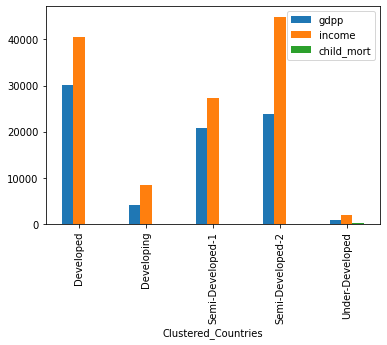

,gdpp,income,child_mort
Clustered_Countries,,,
Developed,30081.739130,40504.565217,4.904348
Developing,4178.606742,8498.651685,34.133708
Semi-Developed-1,20869.166667,27200.000000,7.450000
Semi-Developed-2,23776.666667,44905.833333,28.050000
Under-Developed,854.720000,1947.320000,111.912000


In [876]:
for i,cluster in enumerate(df.hc_cluster_id):
    if(cluster==0):
        df.loc[i,'Clustered_Countries']='Under-Developed'
    elif(cluster==1):
        df.loc[i,'Clustered_Countries']='Developing'
    elif(cluster==2):
        df.loc[i,'Clustered_Countries']='Semi-Developed-1'
    elif(cluster==3):
        df.loc[i,'Clustered_Countries']='Developed'
    else:
        df.loc[i,'Clustered_Countries']='Semi-Developed-2'
        
df[['gdpp', 'income', 'child_mort', 'Clustered_Countries']].groupby('Clustered_Countries').mean().plot(kind = 'bar')
plt.show()

df[['gdpp', 'income', 'child_mort', 'Clustered_Countries']].groupby('Clustered_Countries').mean()

### <font color = blue> Observation : </font>
- Clusters 0 and 1 can be classified as under-developed countries but there is a sizable difference between the mean values
- Cluster 0 thus represents the poorest of the poor that should be in need of aid

In [877]:
# creating a new dataframe for the top 10 most needy countries 

hc_Needy = df[df['hc_cluster_id']==0]
hc_Needy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id,Clustered_Countries,hc_cluster_id
0,Afghanistan,90.200,55.3000,41.9174,248.297,1610.0,9.440,56.20,5.8200,553,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
3,Angola,119.000,2199.1900,100.6050,1514.370,5900.0,22.400,60.10,6.1600,3530,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
17,Benin,111.000,180.4040,31.0780,281.976,1820.0,0.885,61.80,5.3600,758,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
25,Burkina Faso,116.000,110.4000,38.7550,170.200,1430.0,6.810,57.90,5.8700,575,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.300,57.70,6.2600,231,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
28,Cameroon,108.000,290.8200,67.2030,353.700,2660.0,1.910,57.30,5.1100,1310,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.010,48.05,5.2100,446,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
32,Chad,142.875,330.0960,40.6341,390.195,1930.0,6.390,56.50,6.5900,897,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
36,Comoros,88.200,126.8850,34.6819,397.573,1410.0,3.870,65.90,4.7500,769,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
37,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.800,57.50,6.5400,334,0,Under-Developed,2,Under-Developed,0,Under-Developed,0


In [878]:
# checking the total number of countries in need

hc_Needy.shape

(25, 17)

In [879]:
# Top 10 most needy countries

hc_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k3_cluster_id,Clustered_Countries_k3,k4_cluster_id,Clustered_Countries_k4,hs_cluster_id,Clustered_Countries,hc_cluster_id
26,Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
88,Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
37,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
112,Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
132,Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
106,Mozambique,101.000,131.9850,21.8299,193.578,918.0,7.64,54.50,5.5600,419,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
31,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
94,Malawi,90.500,104.6520,30.2481,160.191,1030.0,12.10,53.10,5.3100,459,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
150,Togo,90.300,196.1760,37.3320,279.624,1210.0,1.18,58.70,4.8700,488,0,Under-Developed,2,Under-Developed,0,Under-Developed,0
64,Guinea-Bissau,114.000,81.5030,46.4950,192.544,1390.0,2.97,55.60,5.0500,547,0,Under-Developed,2,Under-Developed,0,Under-Developed,0


In [880]:
hc_Most_Needy = hc_Needy.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

In [881]:
print('HIERARCHICAL CLUSTERING\nTop 10 countries in most need of aid are:\n')
for countries in hc_Most_Needy.country[:10]:
    print(countries)

HIERARCHICAL CLUSTERING
Top 10 countries in most need of aid are:

Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Malawi
Togo
Guinea-Bissau


## <font color = red> Step 7 : Summary and Recommendations </font>

### <font color = brown> # Result Summary </font>


In [882]:
# Comparing the top 10 results from the three clustering algorithms

list1 = [i for i in k_Most_Needy.country]
list2 = [i for i in hs_Most_Needy.country]
list3 = [i for i in hc_Most_Needy.country]
data = {'K-Means Countries':list1,'Hierarchical-Single-Linkage Countries':list2,'Hierarchical-Complete-Linkage Countries':list3}
most_needy_countries = pd.DataFrame(data)

most_needy_countries

,K-Means Countries,Hierarchical-Single-Linkage Countries,Hierarchical-Complete-Linkage Countries
0,Burundi,Burundi,Burundi
1,Liberia,Liberia,Liberia
2,"Congo, Dem. Rep.","Congo, Dem. Rep.","Congo, Dem. Rep."
3,Niger,Niger,Niger
4,Sierra Leone,Sierra Leone,Sierra Leone
5,Madagascar,Madagascar,Mozambique
6,Mozambique,Mozambique,Central African Republic
7,Central African Republic,Central African Republic,Malawi
8,Malawi,Malawi,Togo
9,Eritrea,Eritrea,Guinea-Bissau


### <font color = blue> Observation : </font>
- We see that the top 10 countries by both K-means and Hierarchical (single Linkage) are the same
- The top 10 list of Hierarchical (complet linkage) is almost the same but varies by 2 countries
- The top 5 countries in all the list are the same

In [883]:
print('Comparing number of countries obtained from all clustering methods\n')
print('The total number of poor countries in need of aid obtained are:')
print('K-Means Clustering :',k_Needy.shape[0])
print('Hierarchical-Single-Linkage Clustering :',hs_Needy.shape[0])
print('Hierarchical-Complete-Linkage Clustering :',hc_Needy.shape[0])

Comparing number of countries obtained from all clustering methods

The total number of poor countries in need of aid obtained are:
K-Means Clustering : 48
Hierarchical-Single-Linkage Clustering : 130
Hierarchical-Complete-Linkage Clustering : 25


### <font color = blue> Observation : </font>
- The cluster size for the needy countries obtained from hierarchical Complete linkage is the smallest at 25
- This can help us in focussing resources better on the most needy countries of all
- So we can choose the Hierarchical Complete Linkage clustering algorithm in this case

### <font color = brown> # Final List of Recommendation </font>

In [884]:
# choosing the final list of top 5 countries from Hierarchical Complete Linkage clustering algorithm

print('Final List of Top 5 countries in most need of aid are:\n')
for countries in hc_Most_Needy.country[:5]:
    print(countries)

Final List of Top 5 countries in most need of aid are:

Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
